In [2]:
import pandas as pd
import json
from matplotlib import pyplot as plt

# Experiment 1 and 2

In [22]:
green = dict(x=[], y=[])
green_scale = []
red = dict(x=[], y=[])
red_scale = []
blue = dict(x=[], y=[])
blue_scale = []
red_scale = []
freqs2 = []
sample_number = 2
for j in range(7):
    with open(f'RO_locations_random{j}.json') as f:
        locations = json.load(f)
    data = pd.read_pickle(f'ALL_3_Stage_128_Osc_rand_{j}.pkl')
    for i in locations.keys():
        freqs2.append(data[f'RO{i}'].loc[sample_number])
        if data[f'RO{i}'].loc[sample_number] < 412:
            green['x'].append(locations[i][0])
            green['y'].append(locations[i][1])
            green_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))
        elif 412 < data[f'RO{i}'].loc[sample_number] < 460:
            blue['x'].append(locations[i][0])
            blue['y'].append(locations[i][1])
            blue_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))
        else:
            red['x'].append(locations[i][0])
            red['y'].append(locations[i][1])
            red_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))

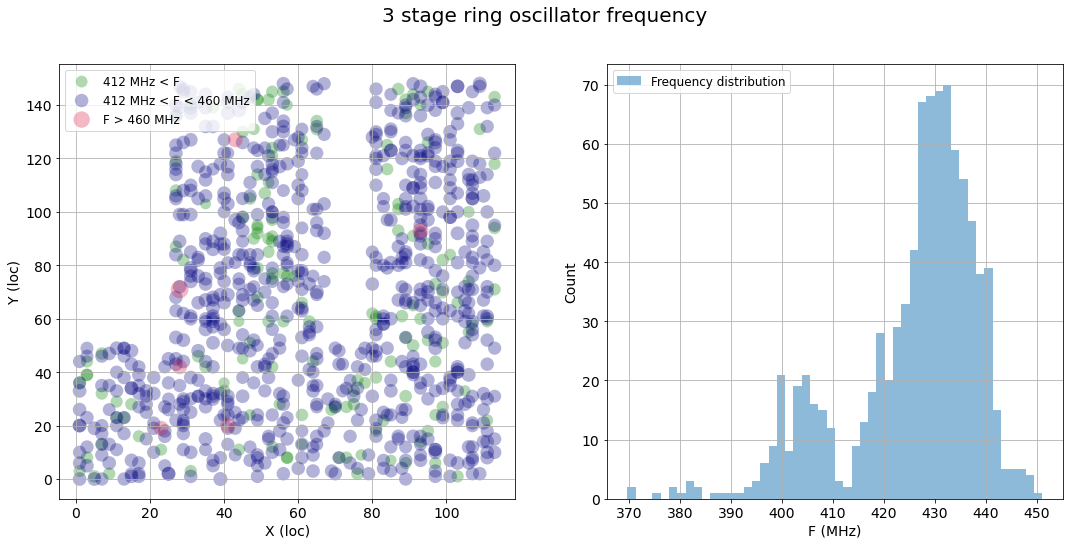

In [59]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8))
#fig = plt.figure(figsize=(12,9))
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
ax.scatter(green['x'], green['y'], c='green', s=green_scale, label='412 MHz < F', alpha=0.3, edgecolors='none')
ax.scatter(blue['x'], blue['y'], c='navy', s=blue_scale, label='412 MHz < F < 460 MHz', alpha=0.3, edgecolors='none')
ax.scatter(red['x'], red['y'], c='crimson', s=red_scale, label='F > 460 MHz', alpha=0.3, edgecolors='none')
ax.set_xlabel('X (loc)')
ax.set_ylabel('Y (loc)')

#plt.title('Arash Data')
ax.legend(loc=2)
ax.grid(True)

ax2.hist([i for i in freqs2 if i < 460], 50, alpha=0.5, label='Frequency distribution')
ax2.grid(True)
ax2.set_xlabel('F (MHz)')
ax2.set_ylabel('Count')
ax2.legend(loc=2)
fig.suptitle('3 stage ring oscillator frequency')
plt.savefig('Frequency_distribution.png')
plt.show()


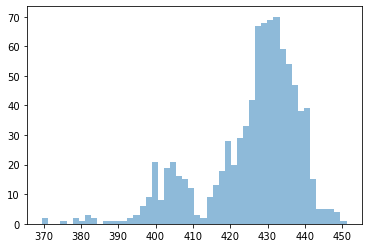

In [14]:
freqs2.remove(max(freqs2))
a = plt.hist(freqs2, 50, alpha=0.5)

In [58]:
freqs2.remove(min(freqs2))

# Experiment 2

In [78]:
green = dict(x=[], y=[])
green_scale = []
red = dict(x=[], y=[])
red_scale = []
blue = dict(x=[], y=[])
blue_scale = []
red_scale = []
freqs2 = []
sample_number = 2
for j in range(1):
    with open(f'RO_locations_random.json') as f:
        locations = json.load(f)
    data = pd.read_pickle(f'ALL_3_Stage_160_Osc_rand_0.pkl')
    for i in locations.keys():
        freqs2.append(data[f'RO{i}'].loc[sample_number])
        if data[f'RO{i}'].loc[sample_number] < 415:
            green['x'].append(locations[i][0])
            green['y'].append(locations[i][1])
            green_scale.append(1*(data[f'RO{i}'].loc[sample_number]))
        elif 415 < data[f'RO{i}'].loc[sample_number] < 500:
            blue['x'].append(locations[i][0])
            blue['y'].append(locations[i][1])
            blue_scale.append(1*(data[f'RO{i}'].loc[sample_number]))
        else:
            red['x'].append(locations[i][0])
            red['y'].append(locations[i][1])
            red_scale.append(1*(data[f'RO{i}'].loc[sample_number]))

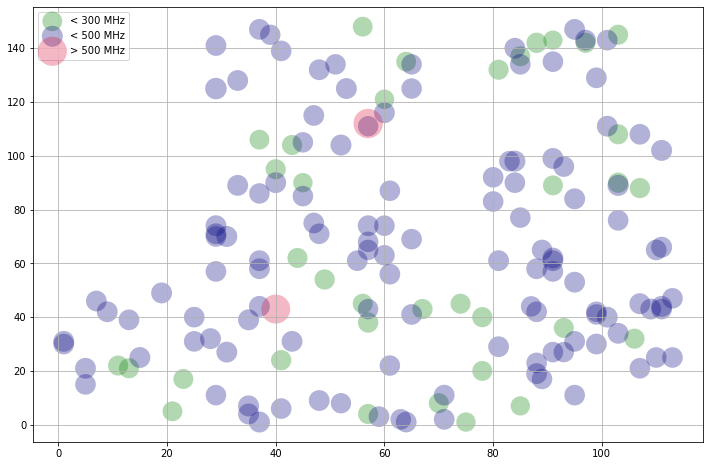

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(green['x'], green['y'], c='green', s=green_scale, label='< 300 MHz', alpha=0.3, edgecolors='none')
ax.scatter(blue['x'], blue['y'], c='navy', s=blue_scale, label='< 500 MHz', alpha=0.3, edgecolors='none')
ax.scatter(red['x'], red['y'], c='crimson', s=red_scale, label='> 500 MHz', alpha=0.3, edgecolors='none')

#plt.title('Arash Data')
ax.legend()
ax.grid(True)

plt.show()

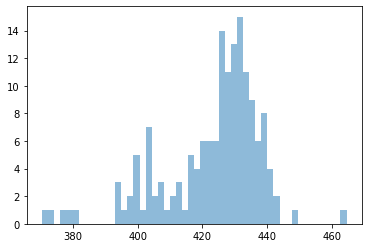

In [77]:
a = plt.hist(freqs2, 50, alpha=0.5)

In [76]:
freqs2.remove(max(freqs2))

In [80]:
data.head()

,RO0,RO1,RO2,RO3,RO4,RO5,RO6,RO7,RO8,RO9,...,RO154,RO155,RO156,RO157,RO158,RO159,Temperature,En_Freq,Duty_Cycle,Timestamp
0,430.104,438.156,425.586,433.592,430.703,434.081,404.875,403.719,427.385,436.497,...,428.332,439.824,440.037,439.663,425.050,424.943,57.706635,0.0,0.0,2021-05-05 17:35:50.135058-07:00
1,430.397,438.300,425.832,433.660,430.860,434.357,405.084,404.020,427.609,436.728,...,428.242,439.376,439.703,439.480,424.906,424.808,56.599268,0.0,0.0,2021-05-05 17:35:50.135058-07:00
2,430.066,438.345,425.853,433.669,430.979,434.604,405.200,404.217,427.601,436.845,...,428.216,439.606,439.924,439.629,425.100,424.816,56.599268,0.0,0.0,2021-05-05 17:35:50.135058-07:00
3,430.229,438.393,426.071,433.770,430.995,434.336,404.986,403.992,427.384,436.746,...,428.278,439.408,439.863,439.505,425.121,424.843,56.107104,0.0,0.0,2021-05-05 17:35:50.135058-07:00
4,430.395,438.433,426.129,433.913,431.129,434.377,405.013,403.974,427.454,436.622,...,428.501,439.697,440.003,439.660,425.110,424.745,55.737982,0.0,0.0,2021-05-05 17:35:50.135058-07:00
